In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Thư viện Scikit-learn hỗ trợ chúng ta chuẩn hóa dữ liệu bằng phương pháp Min-Max Scaling thông qua hàm MinMaxScaler trong module Preprocessing.

Hàm này sẽ chuyển đổi các đặc trưng bằng cách scale mỗi đặc trưng về 1 phạm vi nhất định.

Công thức của nó là:

X_std = (X – X.min(axis=0)) / (X.max(axis=0) – X.min(axis=0))
X_scaled = X_std * (max – min) + min

Trong đó:

X là điểm dữ liệu cần chuẩn hóa, 
X_scaled là dữ liệu được chuẩn hóa,
X_std là tỉ lệ chuẩn hóa, 
max và min là khoảng chuẩn hóa của giá trị.

1. Khởi tạo dữ liệu

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,49.763179,17.146283,10.318427,6.337793,19.509877
1,54.939084,1.176393,11.991730,-2.412933,22.029622
2,51.038368,0.666411,10.862791,-2.616441,19.352994
3,58.721101,5.126111,7.706171,-3.457252,21.049463
4,56.072973,0.769736,10.919494,1.237312,19.949053


2. Trực quan hóa dữ liệu sinh ra

<Axes: ylabel='Density'>

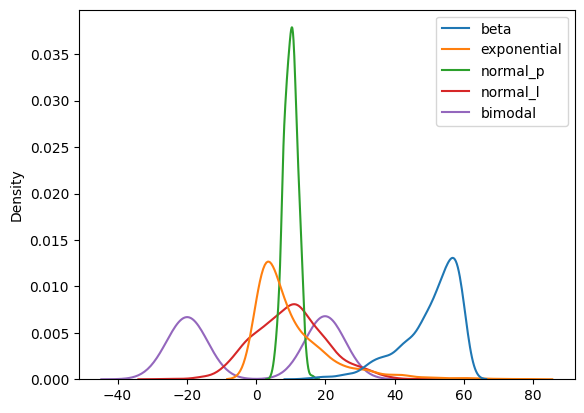

In [5]:
sns.kdeplot(data=df)

In [6]:
# Hiển thị thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.340559,10.348769,10.036048,9.871199,-0.041271
std,8.553806,11.079473,1.967011,10.257380,20.187073
min,14.663905,0.007074,4.424472,-26.259157,-29.486159
25%,46.077241,2.753499,8.652755,2.794576,-19.958182
50%,52.923732,6.589654,10.071718,9.852835,-0.017351
75%,57.022281,14.239762,11.399498,16.429559,19.921518
max,59.997083,77.168337,16.640875,47.209194,28.742809


<Axes: ylabel='Density'>

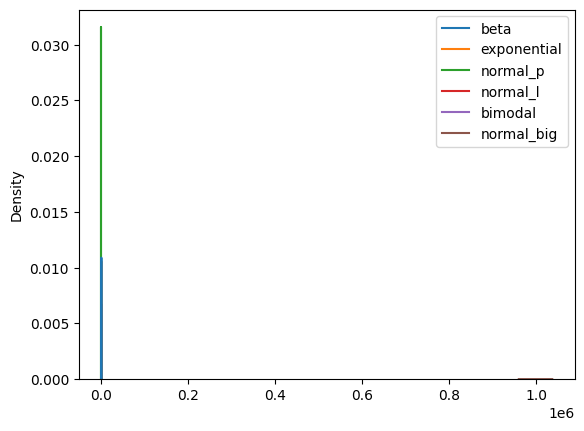

In [7]:
# Thêm một đặc trưng với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

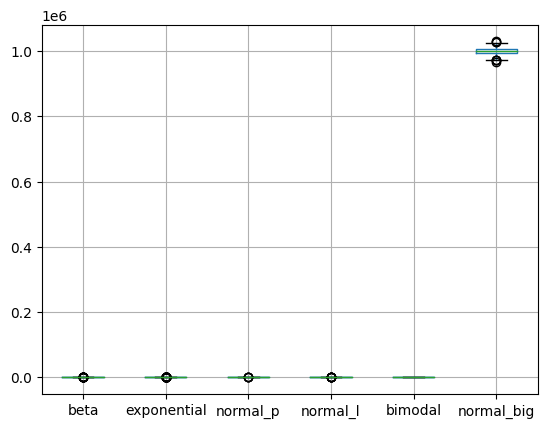

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

3. Chuẩn hóa với Min-Max scaling

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.774251,0.222122,0.482462,0.443687,0.841437,0.305625
1,0.888426,0.015154,0.619434,0.324578,0.884711,0.412556
2,0.802381,0.008545,0.527022,0.321808,0.838743,0.805379
3,0.971853,0.066342,0.268631,0.310364,0.867878,0.430665
4,0.913438,0.009884,0.531664,0.374263,0.848980,0.597857


<Axes: ylabel='Density'>

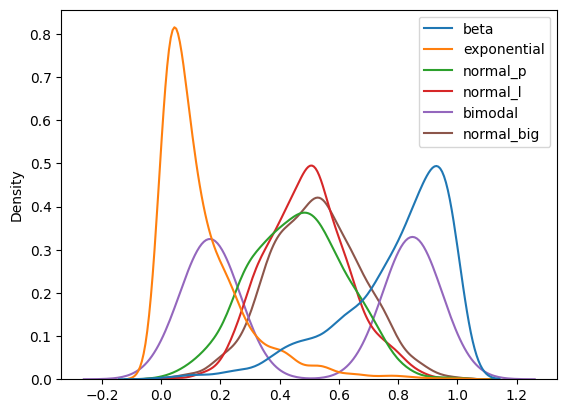

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<Axes: >

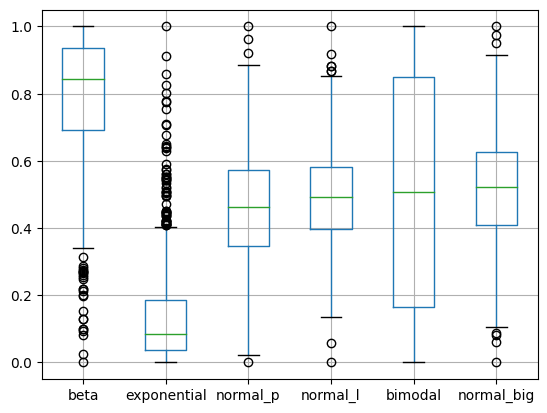

In [13]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.786988,0.134027,0.459348,0.491781,0.505674,0.521431
std,0.188688,0.143589,0.161014,0.139616,0.346684,0.154725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.692944,0.035593,0.346115,0.395459,0.163630,0.410027
50%,0.843970,0.085309,0.462267,0.491531,0.506085,0.522420
75%,0.934379,0.184454,0.570956,0.581049,0.848507,0.625843
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [16]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [17]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[14.663904551920847,
 0.0070742856726557,
 4.424472351028831,
 -26.259156749855308,
 -29.486159124656986,
 967307.240093027]

In [18]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.99708279992629,
 77.16833671982789,
 16.6408753453055,
 47.20919449929588,
 28.74280894819993,
 1029673.5715759204]

In [20]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Chúng ta có thể thấy rằng, dữ liệu đã được đưa về khoảng 0-1 so với các khoảng rất khác nhau như ban đầu